In [1]:
%matplotlib inline
import json
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)
gray = (167/255, 168/255, 170/255, 1)
red = (179/255, 27/255, 27/255, 1)
blue = (0,47/255, 108/255,1)
markersize=20

# Mean Plots

In [3]:
ls ../../trainedModels/*/*/metrics

../../trainedModels/defaultConv_jltwo_beta4_0000_ica0_0500_lat10_batch64_lr0_0001_anneal100000/20210819-135329/metrics:
local_mig_0_1/  local_mig_1_0/         local_modularity_0_6/
local_mig_0_2/  local_modularity_0_1/  local_modularity_1_0/
local_mig_0_3/  local_modularity_0_2/  mig/
local_mig_0_6/  local_modularity_0_3/  modularity_explicitness/

../../trainedModels/defaultConv_jltwo_beta4_0000_ica0_0500_lat10_batch64_lr0_0001_anneal100000/20210819-165438/metrics:
local_mig_0_1/  local_mig_1_0/         local_modularity_0_6/
local_mig_0_2/  local_modularity_0_1/  local_modularity_1_0/
local_mig_0_3/  local_modularity_0_2/  mig/
local_mig_0_6/  local_modularity_0_3/  modularity_explicitness/

../../trainedModels/defaultConv_jltwo_beta4_0000_ica0_0500_lat10_batch64_lr0_0001_anneal100000/20210819-195540/metrics:
local_mig_0_1/  local_mig_1_0/         local_modularity_0_6/
local_mig_0_2/  local_modularity_0_1/  local_modularity_1_0/
local_mig_0_3/  local_modularity_0_2/  mig/
local_mig_0_

In [4]:
combinedOutputs = "../../trainedModels"

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


10 beta-VAE
10 beta-VAE
10 beta-VAE
10 beta-VAE
10 beta-VAE
10 JL1-VAE
10 JL1-VAE
10 JL1-VAE
10 JL1-VAE
10 JL1-VAE


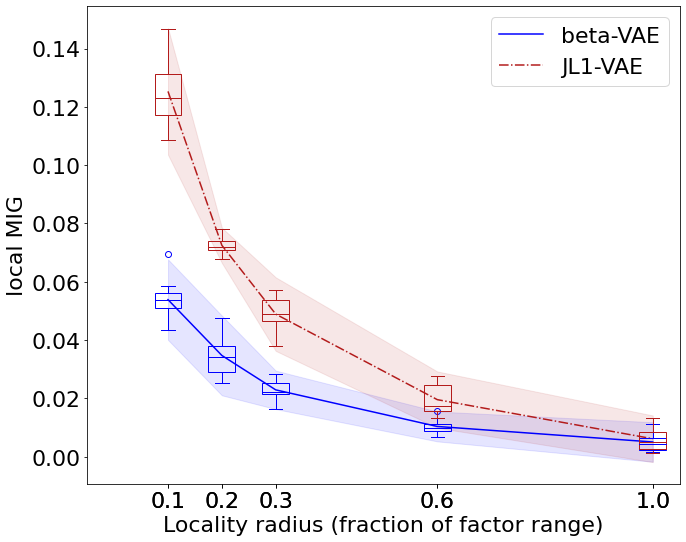

10 beta-VAE
10 beta-VAE
10 beta-VAE
10 beta-VAE
10 beta-VAE
10 JL1-VAE
10 JL1-VAE
10 JL1-VAE
10 JL1-VAE
10 JL1-VAE


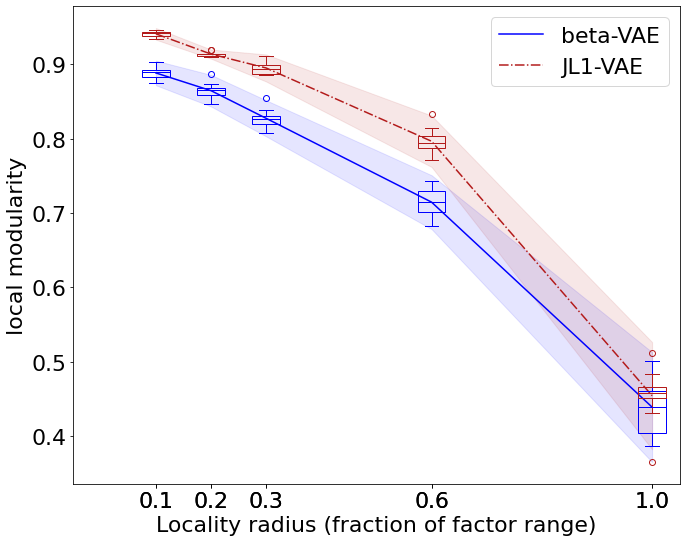

In [5]:
# Gather evaluation results
evaluation_result_template = "{}/metrics/{}/results/aggregate/evaluation.json"
experiment_output_path = f"{combinedOutputs}"

stats_summaries = {}
for metric, metvalname in [("local_mig","evaluation_results.local_discrete_migs_samples"), 
               ("local_modularity","evaluation_results.local_modularity_scores_samples")]:
    stats_summaries[metric] = {}
    for latdim in ["10"]:
        f = plt.figure(figsize=(10,8))
        bind = 1
        beta = "4"
        experiment_names = [
            (f"defaultConv_lone_beta4_0000_ica0_0000_lat10_batch64_lr0_0001_anneal100000", "blue", "beta-VAE","-"),
            (f"defaultConv_lone_beta4_0000_ica0_1000_lat10_batch64_lr0_0001_anneal100000", red, "JL1-VAE","-."),
                           ]
        data = []
        for experiment_name, color, metlabel, linestyle in experiment_names:
            stats_summaries[metric][metlabel] = []
            evaluation_filepaths = glob.glob(f"{experiment_output_path}/{experiment_name}/*/metrics/{metric}*/results/aggregate/evaluation.json")
            for ind, filename in enumerate(evaluation_filepaths):
                if "2021060" in filename:
                    continue
                else: 
                    pass#print(filename)
                #print(filename,label)
                evaluation_results = json.loads(
                        open(filename, "r").read())
                locality = float(evaluation_results["evaluation_config.local_sample_factors.locality_proportion"])
                met_samps = evaluation_results[metvalname]
                data.append((metlabel, locality, np.mean(met_samps)))
                #if bind == 0 and ind == 0 and enind < 2:
                #    plt.plot(locality, np.mean(met_samps), markerfacecolor=(1, 1, 1, 0), markeredgecolor=color, markeredgewidth=2, marker=marker,label=label, markersize=markersize,linestyle="None" )
                #else:
                #    plt.plot(locality, np.mean(met_samps), markerfacecolor=(1, 1, 1, 0), markeredgecolor=color, markeredgewidth=2, marker=marker, markersize=markersize,linestyle="None" )


            import scipy.stats
            allLocalities = [0.1, 0.2, 0.3, 0.6, 1.0]
            avgMetVals = []
            lowMetVals = []
            highMetVals = []
            for desiredLocality in allLocalities:
                metvals = [metval for (label, locality, metval) in data if label == metlabel and locality == desiredLocality]
                stats_summaries[metric][metlabel].append(metvals)
                print(len(metvals), metlabel)
                avgMetVals.append(np.mean(metvals))
                highMetVals.append(np.mean(metvals) + 2 * np.std(metvals))
                lowMetVals.append(np.mean(metvals) - 2 * np.std(metvals))
                plt.boxplot([metvals], vert=True, positions=[desiredLocality],widths=[0.05],
                               patch_artist=True,
                                boxprops=dict(facecolor=(1,1,1,0), color=color),
                                capprops=dict(color=color),
                                whiskerprops=dict(color=color),
                                flierprops=dict(color=color, markeredgecolor=color),
                                medianprops=dict(color=color))
                #print(scipy.stats.ttest_ind(betametvals, lirjmetvals))
            plt.plot(allLocalities, avgMetVals, color=color,label=metlabel, linestyle=linestyle)
            plt.fill_between(allLocalities, lowMetVals, highMetVals, color=color, alpha=.1)
        plt.ylabel(metric.replace("_"," ").replace("mig","MIG"))
        plt.xlabel("Locality radius (fraction of factor range)");
        plt.xlim(-0.05,1.05)
        plt.legend()
        plt.tight_layout()
        f.savefig(f"threeDots_{metric}_varyingRho.png")
        plt.show();plt.close();

In [6]:
for metric in ["local_mig","local_modularity"]:
    for i in range(len(allLocalities)):
         print(scipy.stats.ttest_ind(stats_summaries[metric]["beta-VAE"][i], stats_summaries[metric]["JL1-VAE"][i]))

Ttest_indResult(statistic=-16.6469710189598, pvalue=2.228347697984165e-12)
Ttest_indResult(statistic=-15.16978877665425, pvalue=1.0675837841861734e-11)
Ttest_indResult(statistic=-10.95745285043679, pvalue=2.14824630441603e-09)
Ttest_indResult(statistic=-5.045930690633304, pvalue=8.406505601355064e-05)
Ttest_indResult(statistic=-0.6293242084467483, pvalue=0.5370431311590591)
Ttest_indResult(statistic=-17.246790692697875, pvalue=1.2211908241430258e-12)
Ttest_indResult(statistic=-13.339290515678915, pvalue=9.024824787892942e-11)
Ttest_indResult(statistic=-13.397599621855994, pvalue=8.400542413306974e-11)
Ttest_indResult(statistic=-9.814441686223828, pvalue=1.1905325418270439e-08)
Ttest_indResult(statistic=-0.892693410240035, pvalue=0.3838008789585231)
